In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import logging
import tensorflow as tf

logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(1)
np.set_printoptions(suppress=True)

In [3]:
cp_train = pd.read_csv(
    "/home/werner/Projects/tensor_flow/tensor_data.csv",
  header=[0])

cp_train.head()

cp_features = cp_train.copy()
list_to_pop = ['angleX','angleY','angleZ']
cp_labelsX = np.array(cp_features.pop('angleX'))
cp_labelsY = np.array(cp_features.pop('angleY'))
cp_labelsZ = np.array(cp_features.pop('angleZ'))

cp_labels = np.array(cp_labelsX)
cp_labels = np.column_stack((cp_labels, cp_labelsY))
cp_labels = np.column_stack((cp_labels, cp_labelsZ))
cp_features = np.array(cp_features)




print(cp_labels.shape)
print(cp_features.shape)


(1998, 3)
(1998, 8)


2022-06-23 09:01:33.348231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 09:01:33.349023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 09:01:33.349135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-23 09:01:33.349217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-23 09:01:33.349334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/500
63/63 [==============================] - 1s 2ms/step - loss: 370.9238
Epoch 2/500
63/63 [==============================] - 0s 2ms/step - loss: 263.7520
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 187.7480
Epoch 4/500
63/63 [==============================] - 0s 4ms/step - loss: 127.0530
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 104.4606
Epoch 6/500
63/63 [==============================] - 0s 2ms/step - loss: 95.1278
Epoch 7/500
63/63 [==============================] - 0s 2ms/step - loss: 86.6942
Epoch 8/500
63/63 [==============================] - 0s 2ms/step - loss: 80.0602
Epoch 9/500
63/63 [==============================] - 0s 3ms/step - loss: 75.1924
Epoch 10/500
63/63 [==============================] - 0s 2ms/step - loss: 70.5220
Epoch 11/500
63/63 [==============================] - 0s 2ms/step - loss: 67.0655
Epoch 12/500
63/63 [==============================] - 0s 2ms/step - loss: 67.2916
Epoch 13/500
63/63 [

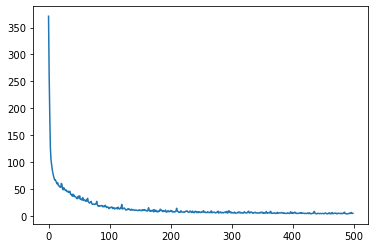

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3,)
                             ])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.0002))

history = model.fit(cp_features, cp_labels, epochs=500, verbose=1)

print("Finished training the model")
plt.plot(history.history['loss'])
print(history.history['loss'][-1])



In [9]:
model.evaluate(cp_features, cp_labels)

50/50 [==============================] - 0s 1ms/step - loss: 3.9858


3.985849380493164